In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import datetime
import seaborn as sns

C:\Users\34745\AppData\Local\Temp\ipykernel_10944\427047487.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\34745\AppData\Local\Temp\ipykernel_10944\427047487.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
data = pd.read_csv("cef_train.csv")
data

,symbol,date,close.mkt,volume,adjusted.mkt,close.nav,adjusted.nav,prem,Class,ExpenseRatio,Name,Inception date,Category1,Category2,Category3,Market cap,Current dividend yield,Historical average dividend yield,Leverage factor,Average volume
0,AFB,2019-01-02,12.37,80900,10.031555,14.26,12.446114,-13.253859,GML,0.0178,AllianceBernstein National Municipal Income Fu...,01/29/2002,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346"
1,AFB,2019-01-03,12.33,50300,10.036439,14.28,12.503905,-13.655461,GML,0.0178,AllianceBernstein National Municipal Income Fu...,01/29/2002,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346"
2,AFB,2019-01-04,12.32,68400,10.028296,14.27,12.495148,-13.665036,GML,0.0178,AllianceBernstein National Municipal Income Fu...,01/29/2002,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346"
3,AFB,2019-01-07,12.48,105200,10.158534,14.27,12.495148,-12.543804,GML,0.0178,AllianceBernstein National Municipal Income Fu...,01/29/2002,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346"
4,AFB,2019-01-08,12.45,68200,10.134113,14.25,12.477633,-12.631580,GML,0.0178,AllianceBernstein National Municipal Income Fu...,01/29/2002,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43144,VMO,2021-12-27,13.75,82100,12.537421,13.60,13.262374,1.102938,GML,0.0221,Invesco Municipal Opportunity Trust CEF,06/04/1992,US Fixed Income,Municipal bonds,Investment grade,"$629,895,989",5.60%,6.56%,1.68,"142,986"
43145,VMO,2021-12-28,13.78,58200,12.564774,13.61,13.272124,1.249082,GML,0.0221,Invesco Municipal Opportunity Trust CEF,06/04/1992,US Fixed Income,Municipal bonds,Investment grade,"$629,895,989",5.60%,6.56%,1.68,"142,986"
43146,VMO,2021-12-29,13.74,44400,12.528301,13.61,13.272124,0.955181,GML,0.0221,Invesco Municipal Opportunity Trust CEF,06/04/1992,US Fixed Income,Municipal bonds,Investment grade,"$629,895,989",5.60%,6.56%,1.68,"142,986"
43147,VMO,2021-12-30,13.84,119600,12.619483,13.60,13.262374,1.764704,GML,0.0221,Invesco Municipal Opportunity Trust CEF,06/04/1992,US Fixed Income,Municipal bonds,Investment grade,"$629,895,989",5.60%,6.56%,1.68,"142,986"


In [3]:
new_data = data[['symbol','date','close.mkt']]
new_data

,symbol,date,close.mkt
0,AFB,2019-01-02,12.37
1,AFB,2019-01-03,12.33
2,AFB,2019-01-04,12.32
3,AFB,2019-01-07,12.48
4,AFB,2019-01-08,12.45
...,...,...,...
43144,VMO,2021-12-27,13.75
43145,VMO,2021-12-28,13.78
43146,VMO,2021-12-29,13.74
43147,VMO,2021-12-30,13.84


In [4]:
tickers = sorted(list(set(data.symbol)))
date_column = new_data[new_data['symbol'] == 'AFB']['date']
fund_data = pd.DataFrame({'date': date_column})
for tick in tickers:
    temp_data = new_data[new_data['symbol'] == tick][['date', 'close.mkt']].rename(columns={'close.mkt': tick})
    fund_data = pd.merge(fund_data, temp_data, on='date', how='left')

fund_data = fund_data.apply(pd.to_numeric, errors='ignore')
fund_data

,date,AFB,BFK,BKN,BLE,BTA,BTT,BYM,CXH,DMB,...,PMF,PML,PMO,PMX,SBI,VFL,VGM,VKI,VKQ,VMO
0,2019-01-02,12.37,12.43,13.450000,13.20,10.87,20.799999,12.72,9.00,12.11,...,12.89,13.51,11.41,11.56,8.48,12.17,11.65,10.06,11.30,11.40
1,2019-01-03,12.33,12.59,13.540000,13.22,11.01,21.070000,12.85,9.03,12.14,...,12.91,13.58,11.52,11.51,8.49,12.25,11.68,10.22,11.37,11.44
2,2019-01-04,12.32,12.59,13.560000,13.14,10.98,21.070000,12.86,9.06,12.12,...,12.97,13.53,11.47,11.41,8.48,12.21,11.70,10.21,11.36,11.38
3,2019-01-07,12.48,12.70,13.700000,13.24,11.10,21.280001,12.97,9.07,12.32,...,12.95,13.53,11.53,11.48,8.49,12.31,11.79,10.27,11.44,11.48
4,2019-01-08,12.45,12.68,13.690000,13.30,11.16,21.410000,13.14,9.07,12.34,...,12.90,13.59,11.69,11.57,8.50,12.35,11.85,10.29,11.50,11.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2021-12-27,15.04,15.37,17.209999,15.32,14.70,25.860001,15.53,9.96,14.30,...,14.90,14.59,14.65,12.71,9.45,14.15,13.91,12.23,13.31,13.75
753,2021-12-28,15.03,15.35,17.219999,15.31,15.00,25.799999,15.53,9.87,14.31,...,14.88,14.61,14.44,12.81,9.51,14.14,13.96,12.21,13.29,13.78
754,2021-12-29,15.03,15.35,17.190001,14.99,14.99,25.850000,15.51,10.08,14.32,...,15.02,14.57,14.52,12.69,9.56,14.16,13.95,12.23,13.28,13.74
755,2021-12-30,14.92,15.50,17.219999,15.07,15.18,26.040001,15.59,10.07,14.35,...,15.08,14.57,14.54,12.74,9.62,14.10,13.98,12.26,13.31,13.84


In [5]:
fund_data.isna().sum()

date    0
AFB     0
BFK     0
BKN     0
BLE     0
BTA     0
BTT     0
BYM     0
CXH     0
DMB     0
DMF     0
DSM     0
DTF     0
EIM     0
EOT     0
ETX     0
EVN     0
EXD     0
FMN     0
IIM     0
IQI     0
KTF     0
LEO     0
MHD     0
MMD     0
MMU     0
MNP     0
MQT     0
MQY     0
MUE     0
MUI     0
MVF     0
MVT     0
MYD     0
MYI     0
NAD     0
NBH     0
NBO     0
NBW     0
NEA     0
NEV     0
NIM     0
NMI     0
NUV     0
NUW     0
NVG     0
NXP     0
NZF     0
PMF     0
PML     0
PMO     0
PMX     0
SBI     0
VFL     0
VGM     0
VKI     0
VKQ     0
VMO     0
dtype: int64

In [6]:
app1 = dash.Dash(__name__)

fund_data

app1.layout = html.Div([
    html.H1("Historical Fund Prices"),
    
    dcc.Dropdown(
        id='fund-dropdown',
        options=[{'label': fund, 'value': fund} for fund in fund_data.columns[1:]],  
        multi=True,
        value=fund_data.columns[1:4], 
        style={'margin-bottom': '20px'}
    ),
    
    dcc.Graph(id='line-chart')
])

@app1.callback(
    Output('line-chart', 'figure'),
    [Input('fund-dropdown', 'value')]
)
def update_line_chart(selected_funds):
    fig = px.line(fund_data, x='date', y=selected_funds, title='Historical Fund Prices')
    return fig

if __name__ == '__main__':
    app1.run_server(debug=True, port=8050, dev_tools_ui=False)

In [7]:
# compute 1-year/ 2-years/ 3-years cumulative rate of return
ret_1 = []
ret_2 = []
for t in tickers:
    ret_1.extend(data[data['symbol'] == t]['adjusted.mkt'].pct_change(252).shift(-252))
    ret_2.extend(data[data['symbol'] == t]['adjusted.mkt'].pct_change(252*2).shift(-252*2))
    # ret_3.extend(data[data['symbol'] == t]['adjusted.mkt'].pct_change(252*3).shift(-252*3))
data['ret_1'] = ret_1
data['ret_2'] = ret_2
data

,symbol,date,close.mkt,volume,adjusted.mkt,close.nav,adjusted.nav,prem,Class,ExpenseRatio,...,Category1,Category2,Category3,Market cap,Current dividend yield,Historical average dividend yield,Leverage factor,Average volume,ret_1,ret_2
0,AFB,2019-01-02,12.37,80900,10.031555,14.26,12.446114,-13.253859,GML,0.0178,...,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346",0.169404,0.269993
1,AFB,2019-01-03,12.33,50300,10.036439,14.28,12.503905,-13.655461,GML,0.0178,...,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346",0.178132,0.263213
2,AFB,2019-01-04,12.32,68400,10.028296,14.27,12.495148,-13.665036,GML,0.0178,...,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346",0.178243,0.273930
3,AFB,2019-01-07,12.48,105200,10.158534,14.27,12.495148,-12.543804,GML,0.0178,...,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346",0.165642,0.248900
4,AFB,2019-01-08,12.45,68200,10.134113,14.25,12.477633,-12.631580,GML,0.0178,...,US Fixed Income,Municipal bonds,Unconstrained,"$302,684,176",4.65%,5.78%,1.59,"75,346",0.166777,0.248672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43144,VMO,2021-12-27,13.75,82100,12.537421,13.60,13.262374,1.102938,GML,0.0221,...,US Fixed Income,Municipal bonds,Investment grade,"$629,895,989",5.60%,6.56%,1.68,"142,986",NaN,NaN
43145,VMO,2021-12-28,13.78,58200,12.564774,13.61,13.272124,1.249082,GML,0.0221,...,US Fixed Income,Municipal bonds,Investment grade,"$629,895,989",5.60%,6.56%,1.68,"142,986",NaN,NaN
43146,VMO,2021-12-29,13.74,44400,12.528301,13.61,13.272124,0.955181,GML,0.0221,...,US Fixed Income,Municipal bonds,Investment grade,"$629,895,989",5.60%,6.56%,1.68,"142,986",NaN,NaN
43147,VMO,2021-12-30,13.84,119600,12.619483,13.60,13.262374,1.764704,GML,0.0221,...,US Fixed Income,Municipal bonds,Investment grade,"$629,895,989",5.60%,6.56%,1.68,"142,986",NaN,NaN


In [20]:
summary_return = pd.DataFrame({'fund': tickers})
avg_return1 = []
median_return1=[]
avg_return2 = []
median_return2=[]
ExpenseRatio=[]
Market_cap=[]
Current_dividend_yield=[]
Historical_average_dividend_yield=[]
Leverage_factor=[]
Average_volume=[]
for t in tickers:
    avg_return1.append(data[data['symbol']==t]['ret_1'].mean())
    median_return1.append(data[data['symbol']==t]['ret_1'].median())
    avg_return2.append(data[data['symbol']==t]['ret_2'].mean())
    median_return2.append(data[data['symbol']==t]['ret_2'].median())
    ExpenseRatio.append(data[data['symbol']==t]['ExpenseRatio'].iloc[0])
    Market_cap.append(data[data['symbol']==t]['Market cap'].iloc[0])
    Current_dividend_yield.append(data[data['symbol']==t]['Current dividend yield'].iloc[0])
    Historical_average_dividend_yield.append(data[data['symbol']==t]['Historical average dividend yield'].iloc[0])
    Leverage_factor.append(data[data['symbol']==t]['Leverage factor'].iloc[0])
    Average_volume.append(data[data['symbol']==t]['Average volume'].iloc[0])
summary_return['avg_return1'] = avg_return1
summary_return['median_return1'] = median_return1
summary_return['avg_return2'] = avg_return2
summary_return['median_return2'] = median_return2
summary_return['ExpenseRatio'] = ExpenseRatio
summary_return['Market cap'] = Market_cap
summary_return['Current dividend yield'] = Current_dividend_yield
summary_return['Historical average dividend yield'] = Historical_average_dividend_yield
summary_return['Leverage factor'] = Leverage_factor
summary_return['Average volume'] = Average_volume
summary_return

,fund,avg_return1,median_return1,avg_return2,median_return2,ExpenseRatio,Market cap,Current dividend yield,Historical average dividend yield,Leverage factor,Average volume
0,AFB,0.100990,0.084194,0.208097,0.209550,0.0178,"$302,684,176",4.65%,5.78%,1.59,"75,346"
1,BFK,0.105703,0.101219,0.213740,0.204942,0.0198,"$443,961,221",5.23%,6.18%,1.64,"126,734"
2,BKN,0.153336,0.135012,0.323994,0.332005,0.0184,"$199,871,540",5.85%,6.29%,1.66,"87,430"
3,BLE,0.082748,0.065870,0.166888,0.170861,0.0202,"$244,478,033",5.24%,6.19%,1.64,"121,130"
4,BTA,0.106553,0.082873,0.211753,0.210162,0.0200,"$127,278,736",6.33%,5.95%,1.62,"42,231"
5,BTT,0.092767,0.079151,0.192329,0.195477,0.0149,"$1,493,307,994",3.44%,3.92%,1.55,"95,900"
6,BYM,0.114342,0.103299,0.237163,0.239889,0.0193,"$290,733,066",5.38%,5.64%,1.59,"55,653"
7,CXH,0.073701,0.060079,0.148421,0.154878,0.0233,"$65,138,252",4.44%,6.41%,1.58,"23,014"
8,DMB,0.099042,0.056391,0.197437,0.205737,0.0202,"$199,445,095",5.27%,5.16%,1.14,"37,948"
9,DMF,0.082539,0.055928,0.165034,0.175580,0.0148,"$129,069,964",4.61%,6.33%,1.31,"46,973"


In [22]:
summary_return.dtypes

fund                                  object
avg_return1                          float64
median_return1                       float64
avg_return2                          float64
median_return2                       float64
ExpenseRatio                         float64
Market cap                            object
Current dividend yield                object
Historical average dividend yield     object
Leverage factor                      float64
Average volume                        object
dtype: object

In [29]:
summary_return["Current dividend yield"] = pd.to_numeric(summary_return["Current dividend yield"].astype(str).str.rstrip('%'))
summary_return["Historical average dividend yield"] = pd.to_numeric(summary_return["Historical average dividend yield"].astype(str).str.rstrip('%'))
summary_return["Average volume"] = pd.to_numeric(summary_return["Average volume"].astype(str).str.replace(',', ''))
summary_return["Market cap"] = pd.to_numeric(summary_return["Market cap"].astype(str).str.replace('$', '').str.replace(',', ''))
summary_return.dtypes

fund                                  object
avg_return1                          float64
median_return1                       float64
avg_return2                          float64
median_return2                       float64
ExpenseRatio                         float64
Market cap                             int64
Current dividend yield               float64
Historical average dividend yield    float64
Leverage factor                      float64
Average volume                         int64
dtype: object

In [30]:
summary_return.set_index('fund', inplace=True)
summary_return.to_csv('summary_return.csv')

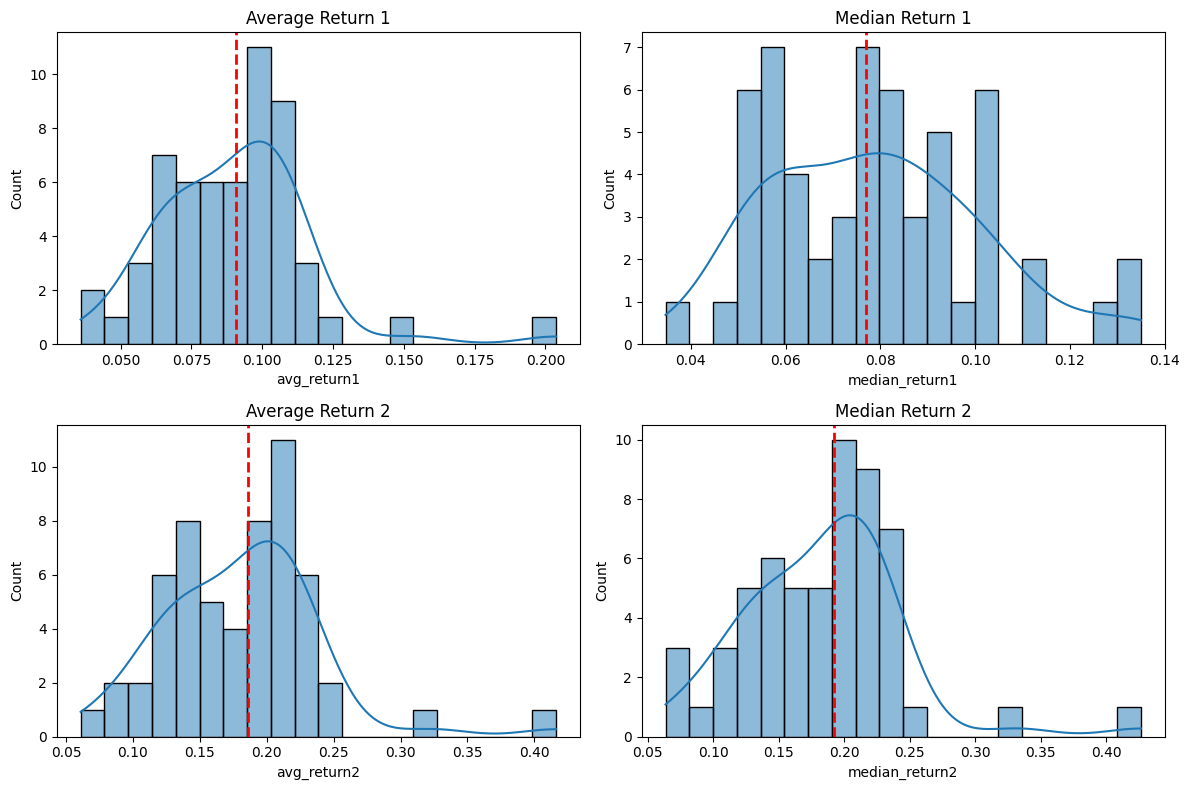

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data=summary_return, x='avg_return1', bins=20, kde=True)
plt.axvline(summary_return['avg_return1'].median(), color='red', linestyle='dashed', linewidth=2)
plt.title('Average Return 1')

plt.subplot(2, 2, 2)
sns.histplot(data=summary_return, x='median_return1', bins=20, kde=True)
plt.axvline(summary_return['median_return1'].median(), color='red', linestyle='dashed', linewidth=2)
plt.title('Median Return 1')

plt.subplot(2, 2, 3)
sns.histplot(data=summary_return, x='avg_return2', bins=20, kde=True)
plt.axvline(summary_return['avg_return2'].median(), color='red', linestyle='dashed', linewidth=2)
plt.title('Average Return 2')

plt.subplot(2, 2, 4)
sns.histplot(data=summary_return, x='median_return2', bins=20, kde=True)
plt.axvline(summary_return['median_return2'].median(), color='red', linestyle='dashed', linewidth=2)
plt.title('Median Return 2')

plt.tight_layout()

plt.show()

In [10]:
data['Category1'].unique()

array(['US Fixed Income', 'Alternatives'], dtype=object)

In [11]:
data['Category2'].unique()

array(['Municipal bonds', 'Options'], dtype=object)

In [12]:
data['Category3'].unique()

array(['Unconstrained', 'Investment grade', 'Broad'], dtype=object)

In [13]:
# how to define the category??

In [14]:
data.to_csv('cef_analysis1.csv')